# Clustering using K-Means, Hierarchical Clustering and DBSCAN

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>1 |</b> Introduction and Objectives</p></div>
<a id="1"></a>

## <font color=#E94560>Introduction</font>
The dataset used in this notebook contains 5 features or columns, viz. 'Age', 'Annual Income', 'Spending Score' and 'Gender'. The data seems to be gathered for regular customers in a mall and based on their spending, the customers are assigned a Spending Score. <br>

## <font color=#E94560>Objective</font>
Our aim is to segment the customers so that targetted marketing can be implemented on the customers. For instance, different categories of customers can be provided with category specific offers, thus leading to increased revenue and profits for the mall stores. <br>
We don't know how many categories should the customers be segmented in, but by domain specific knowledge, one can infer that the number of categories should be between 2 to 10, not more than this. We will see later in the notebook how we can find a resonable number of categories, although there is no correct answer for the number. 

## <font color=#E94560>Working</font>
Since our aim is to categorise or cluster the customers, we will use clustering methods available in sklearn, namely K Means Clustering, Hierarchical Clustering and Density-Based Spatial Clustering of Applications with Noise (DBSCAN). <br>
For those who want to learn about the said methods or are a bit rusty, I am attaching the links to some good articles:

&nbsp;&nbsp;&nbsp;&nbsp;**K Means Clustering**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Understanding the method: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/k-means-clustering-explained-4528df86a120<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html<br>

&nbsp;&nbsp;&nbsp;&nbsp;**Hierarchical Clustering**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Understanding the method: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Difference between agglomerative clustering and divisive clustering: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://prutor.ai/hierarchical-clustering-agglomerative-and-divisive-clustering/

&nbsp;&nbsp;&nbsp;&nbsp;**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Understanding the method: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556<br>
&nbsp;&nbsp;&nbsp;&nbsp;https://towardsdatascience.com/understanding-dbscan-and-implementation-with-python-5de75a786f9f<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Official documentation: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Awesome DBSCAN visualization: <br>
&nbsp;&nbsp;&nbsp;&nbsp;https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b> Basic Libraries and File Imports</p></div>
<a id="2"></a>

In [1]:
# for mathematical operations
import numpy as np
import pandas as pd
import matplotlib
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Check available files in the dataset.

Create dataframe for the data.

In [3]:
df = pd.read_csv(f"/Users/khongdat/Library/CloudStorage/GoogleDrive-k55.1613310017@ftu.edu.vn/My Drive/GitCode/My_learning/2. Data Analyst - Modelling/1. ML_DL/3. Learning/Dataset/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>3 |</b> Exploratory Data Analysis</p></div>
<a id="3"></a>

## Check if the data has any missing value(s).

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Get a basic statistical summary of the data.

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Check number of Males and Females in the Gender column.

In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

We have a feature 'CustomerID' which is unique to each customer and is of no use in analysis and model building. Let's go ahead and drop the feature.

In [9]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Clustermap plots a matrix dataset as a hierarchically-clustered heatmap.

/var/folders/9d/pfp2nf6n3b99spfw7yv6nrt80000gn/T/ipykernel_73690/3383485374.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), cmap='viridis', col_cluster=False);


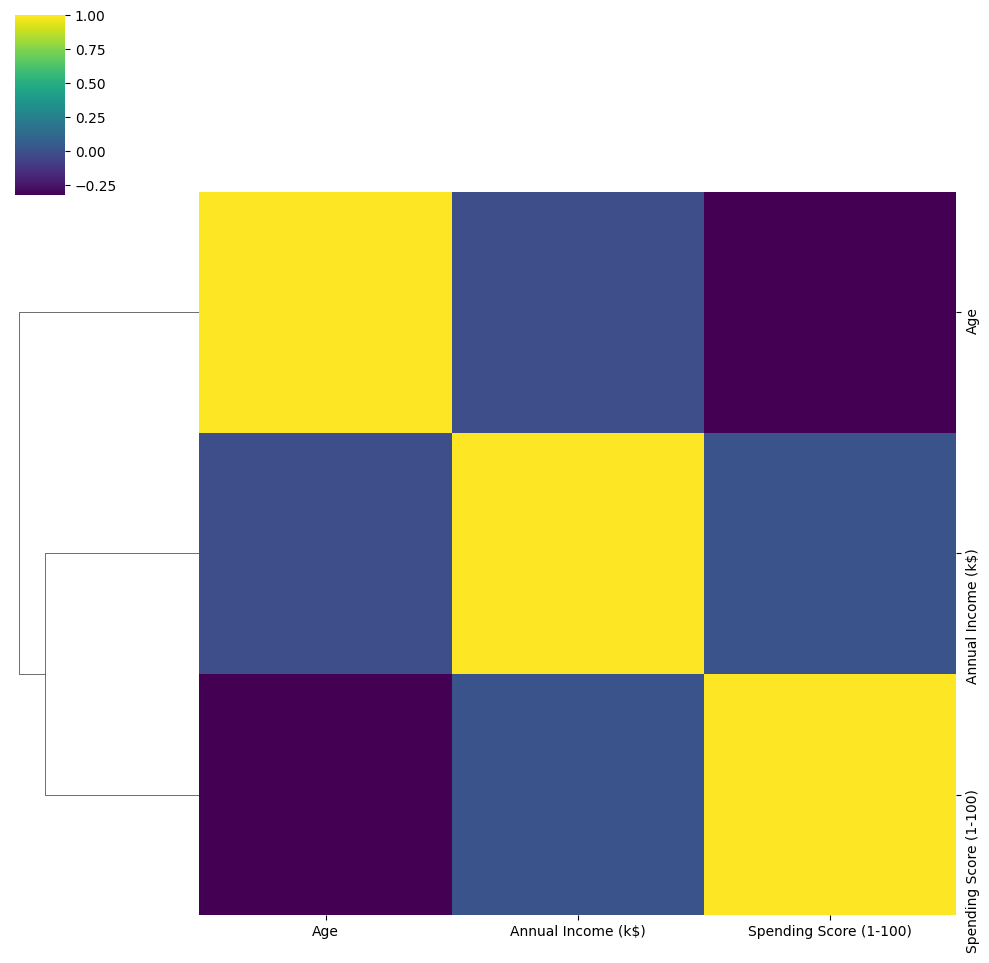

In [10]:
sns.clustermap(df.corr(), cmap='viridis', col_cluster=False);

From the clustermap, we can see that 'Age' is negatively correlated with Spending Score. We can also infer that 'Age' and 'Annual Income' is not related much which is strange. <br>
Let's check if that is the case by plotting a scatterplot between 'Age' and 'Annual Income (k$)' 

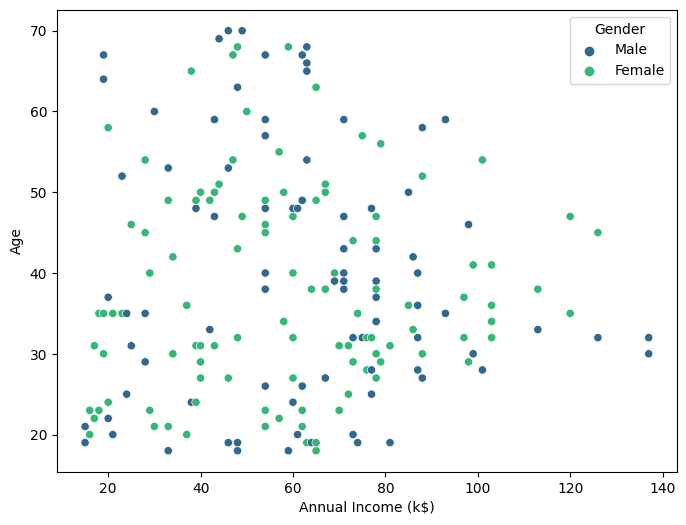

In [11]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis');

As we can see from the above plot, there is no linear relation between 'Age' and 'Annual Income (k$)', which is counter-intuitive.

That said, let us explore different scatterplots between the features.

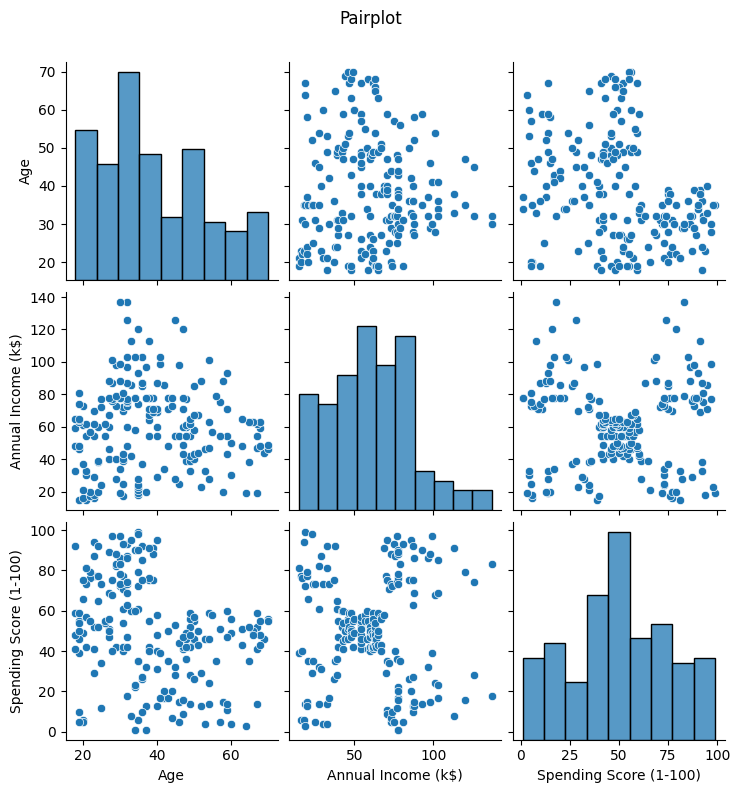

In [12]:
sns.pairplot(df);
plt.suptitle('Pairplot', y=1.05);

Further expanding the scatterplots.

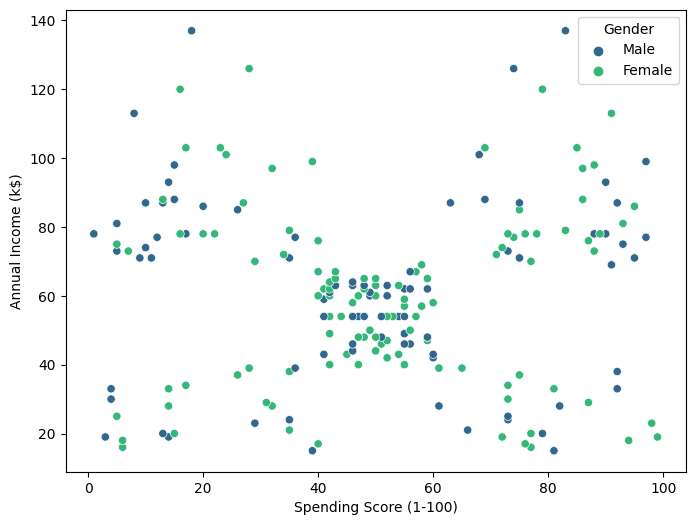

In [13]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', palette='viridis');

From the above plot, we can aleardy visualize some clusters. Thus, we can say the features 'Spending Score (1-100)' and 'Annual Income (k$)' will have a great impact on the cluster segmentation, which we will see later in the notebook.

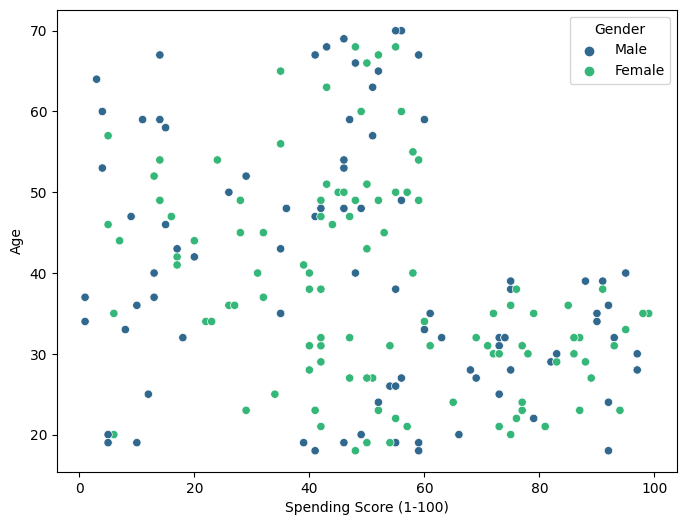

In [14]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender', palette='viridis');

Not exact, but there is somewhat a negative relation between 'Age' and 'Spending Score (1-100)'. Customers with a higher age (40+) have a spending score less than 60. An opposite trend can be seen for young customers (age below 40). Most of them have a spending score above 40 and many are in the 70-100 spending score range.  

Let's visualize the distribution of 'Age', 'Annual Income (k$) and 'Spending Score' (1-100).

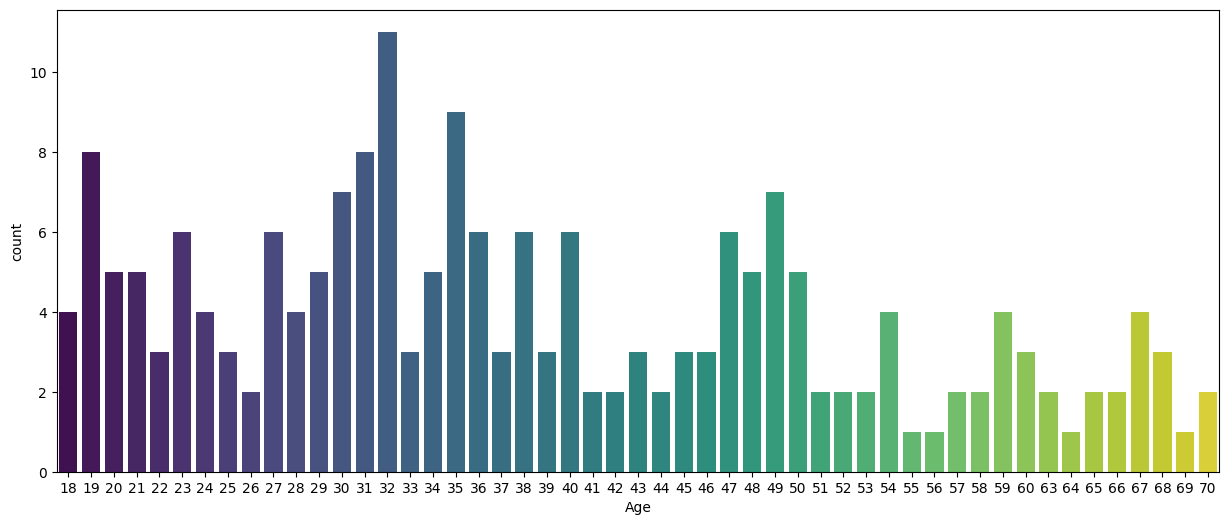

In [15]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df, x='Age', palette='viridis');

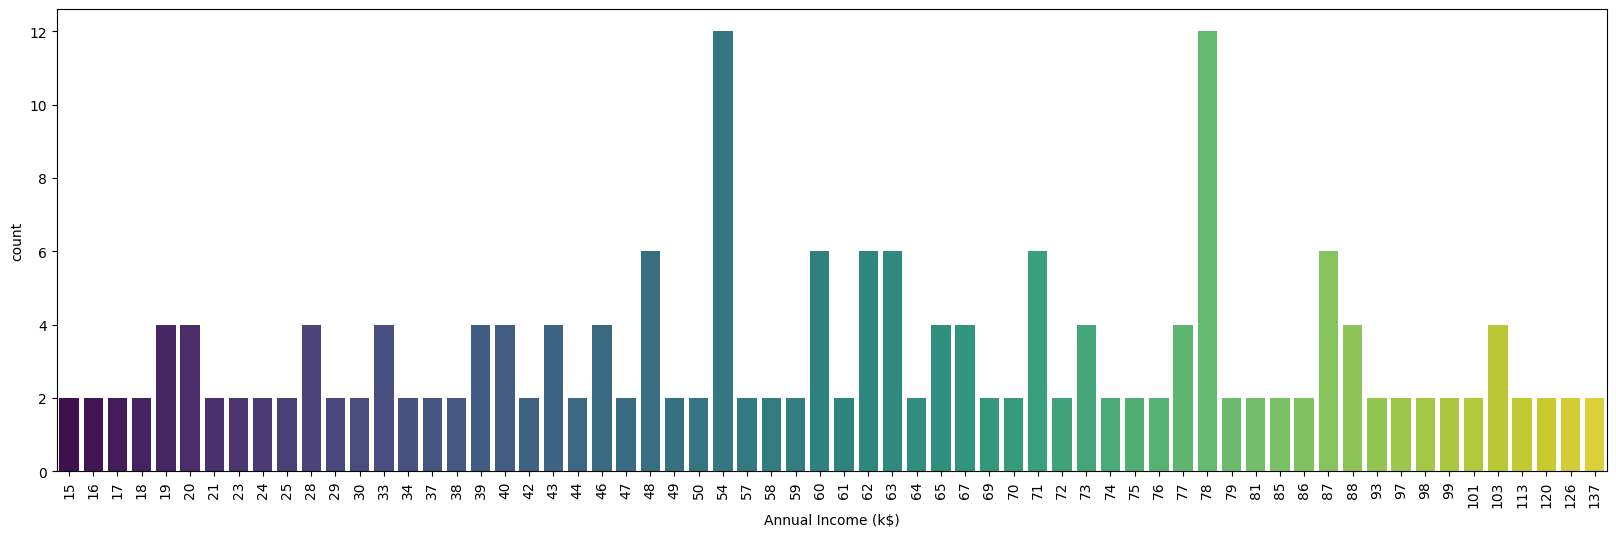

In [16]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Annual Income (k$)', palette='viridis');
plt.xticks(rotation=90);

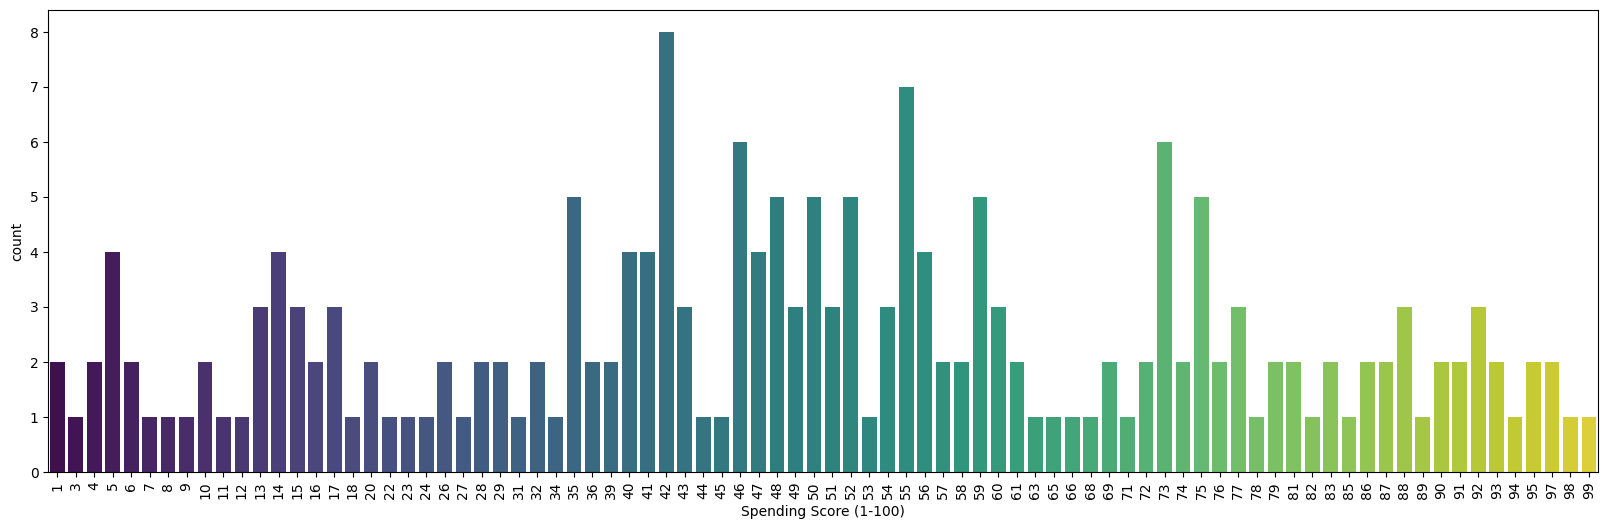

In [17]:
plt.figure(figsize=(20,6),dpi=100)
sns.countplot(data=df, x='Spending Score (1-100)', palette='viridis');
plt.xticks(rotation=90);

Seems that dataset is pretty uniform.

Let's create boxplots for spending score, annual income and age with respect to gender.

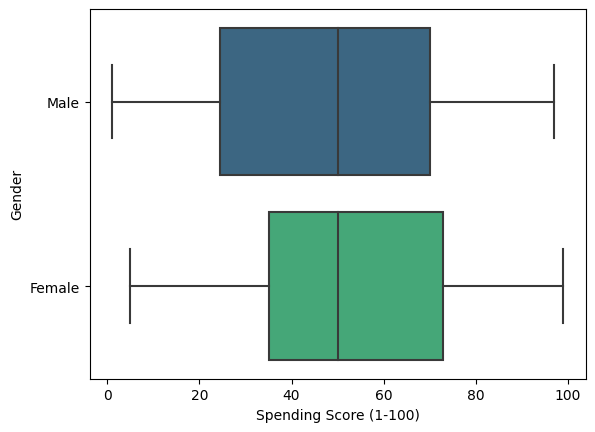

In [18]:
sns.boxplot(data=df, y='Gender', x='Spending Score (1-100)', palette='viridis');

In [19]:
df.groupby('Gender')['Spending Score (1-100)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


Females on average have a higher spending score by 3 units.

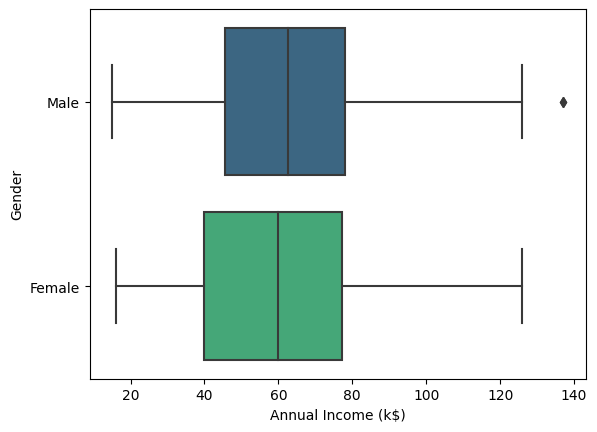

In [20]:
sns.boxplot(data=df, y='Gender', x='Annual Income (k$)', palette='viridis');

In [21]:
df.groupby('Gender')['Annual Income (k$)'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


The mean annual income of males is a tad bit higher although the overall distribution is very similar. 

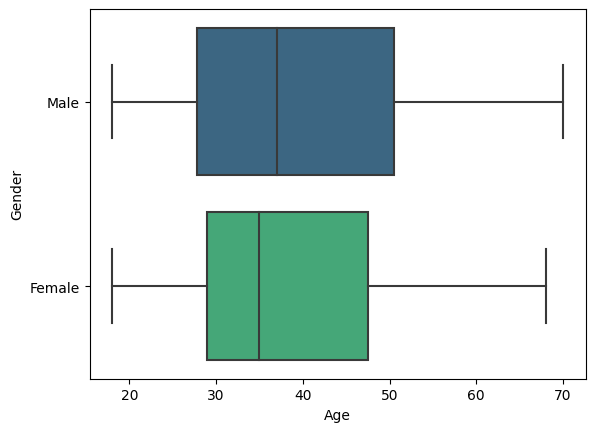

In [22]:
sns.boxplot(data=df, y='Gender', x='Age', palette='viridis');

In [23]:
df.groupby('Gender')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


The average age of females who shop in the mall and are listed in the dataset is around 2 years less than males.

Analysis done, let's move ahead.

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>4 |</b> Data Preparation and Scaling</p></div>
<a id="4"></a>

## <font color=#E94560>4.1 Creating Dummies</font>
<a id="4.1"></a>

We have the 'Gender' feature as a categorical one, let's convert it into dummies. <br>
Dummies create a separate boolean column for all unique values of a feature. In this case, there are just 2 unique components in the 'Gender' column. So 2 columns will be created when we call 'gt_dummies', and where the customer is a female, the boolean column corresponding to the female value will be 1 and the boolean column corresponding to the male value will be 0. <br>
When it's a 1 in the boolean female column, it is understood that the boolean male column will have a 0. Hence, usually we drop a boolean column using 'drop_first=True'.

In [24]:
df = pd.get_dummies(df, drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


## <font color=#E94560>4.2 Scaling</font>
<a id="4.2"></a>

Since the clusturing algos use distance as a metric to create categories, we need to scale the data.

In [25]:
from sklearn.preprocessing import StandardScaler

If you are confused about different scaling techniques, you may refer the following: <br>
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [26]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>5 |</b> Creating Models</p></div>
<a id="5"></a>

## <font color=#E94560>5.1 K Means</font>
<a id="5.1"></a>

In [27]:
from sklearn.cluster import KMeans

To see what k value is good for the data, we well use the 'elbow method' by plotting a graph between sum of squared distances and k value.<br>
To understand the method, visit the webpage:<br>
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [29]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30

for k in range(2,11):
    model = KMeans(n_clusters=k, n_init = 10)
    model.fit(scaled_df)
    ssd.append(model.inertia_)
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Plotting ssd vs k values.

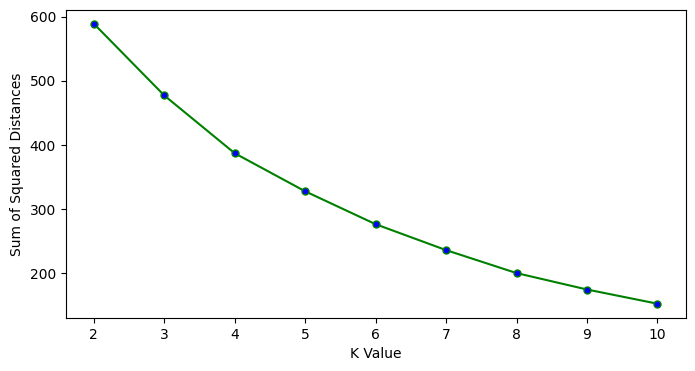

In [30]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

There is no clear 'elbow' but k = 5 seems to be a good choice as the ssd has decreased noticably by the time k value reaches 5. 

Let's create a model with n_clusters = 5.

In [33]:
model = KMeans(n_clusters=5, n_init = 10)
model.fit(scaled_df)

KMeans(n_clusters=5, n_init=10)

The generated labels or categories for the customers. Note that the labels 0 to 5 can change if we re-run the code, i.e., all the customers currently assigned cluster 4 can become 2 or 5 if we re-run the code. But the customers who are alloted a particular category will remain the same.

In [34]:
k_means_labels = model.fit_predict(df)
k_means_labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Let's plot a 3-D scatterplot along with the customers separated by gender based on shapes - circle and diamond.

To understand how to create a 3-D plot using plotly:<br>
https://plotly.com/python/3d-scatter-plots/

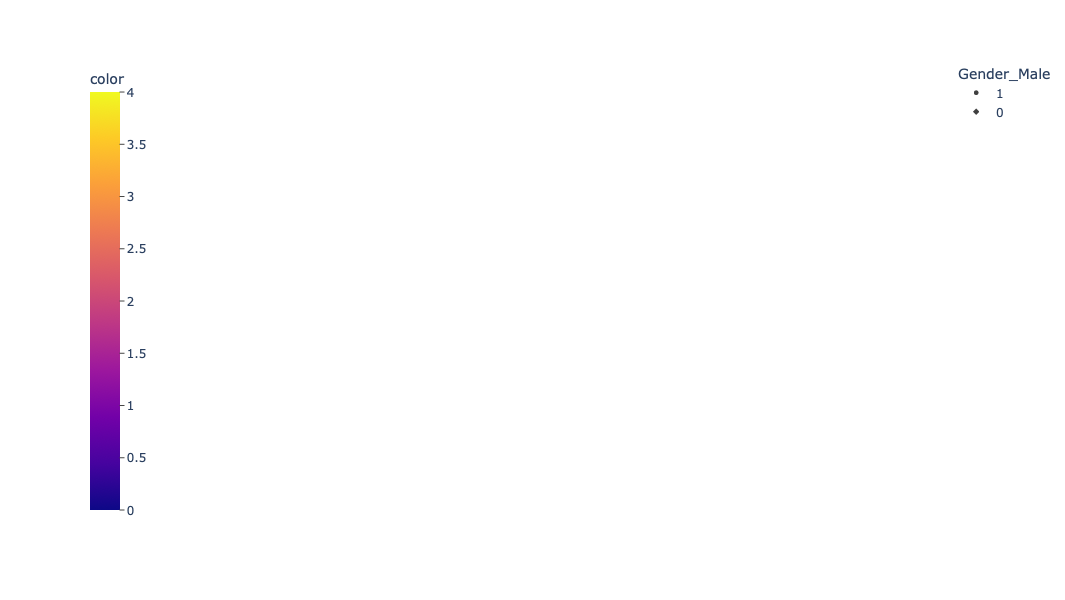

In [40]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', 
                    color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75,
                   width=900, height=600)
fig.update_traces(marker_size = 5)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside")) 
# fig.update_layout is being used to make the 'color' legend shift towards left side, otherwise the 'color' and 'Gender_Male' legends overlap
# fig.show()

K means does work very well with our data! It is precisely categorising the customers in 5 clusters. 

## <font color=#E94560>5.2 Hierarchical Clustering</font>
<a id="5.2"></a>

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [43]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) # each point starts as its own cluster
# From sklearn documentation: 
# distance_thresholdfloat, default=None
# The linkage distance threshold above which, clusters will not be merged. If not None, n_clusters must be None and compute_full_tree must be True.

In [44]:
cluster_labels = model.fit_predict(df)
cluster_labels # each point gets its own label since distance_threshold=0 in the above cell

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [45]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5] # display only 5 rows
# format: point 1, point 2, distance between the points, number of points in the cluster

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

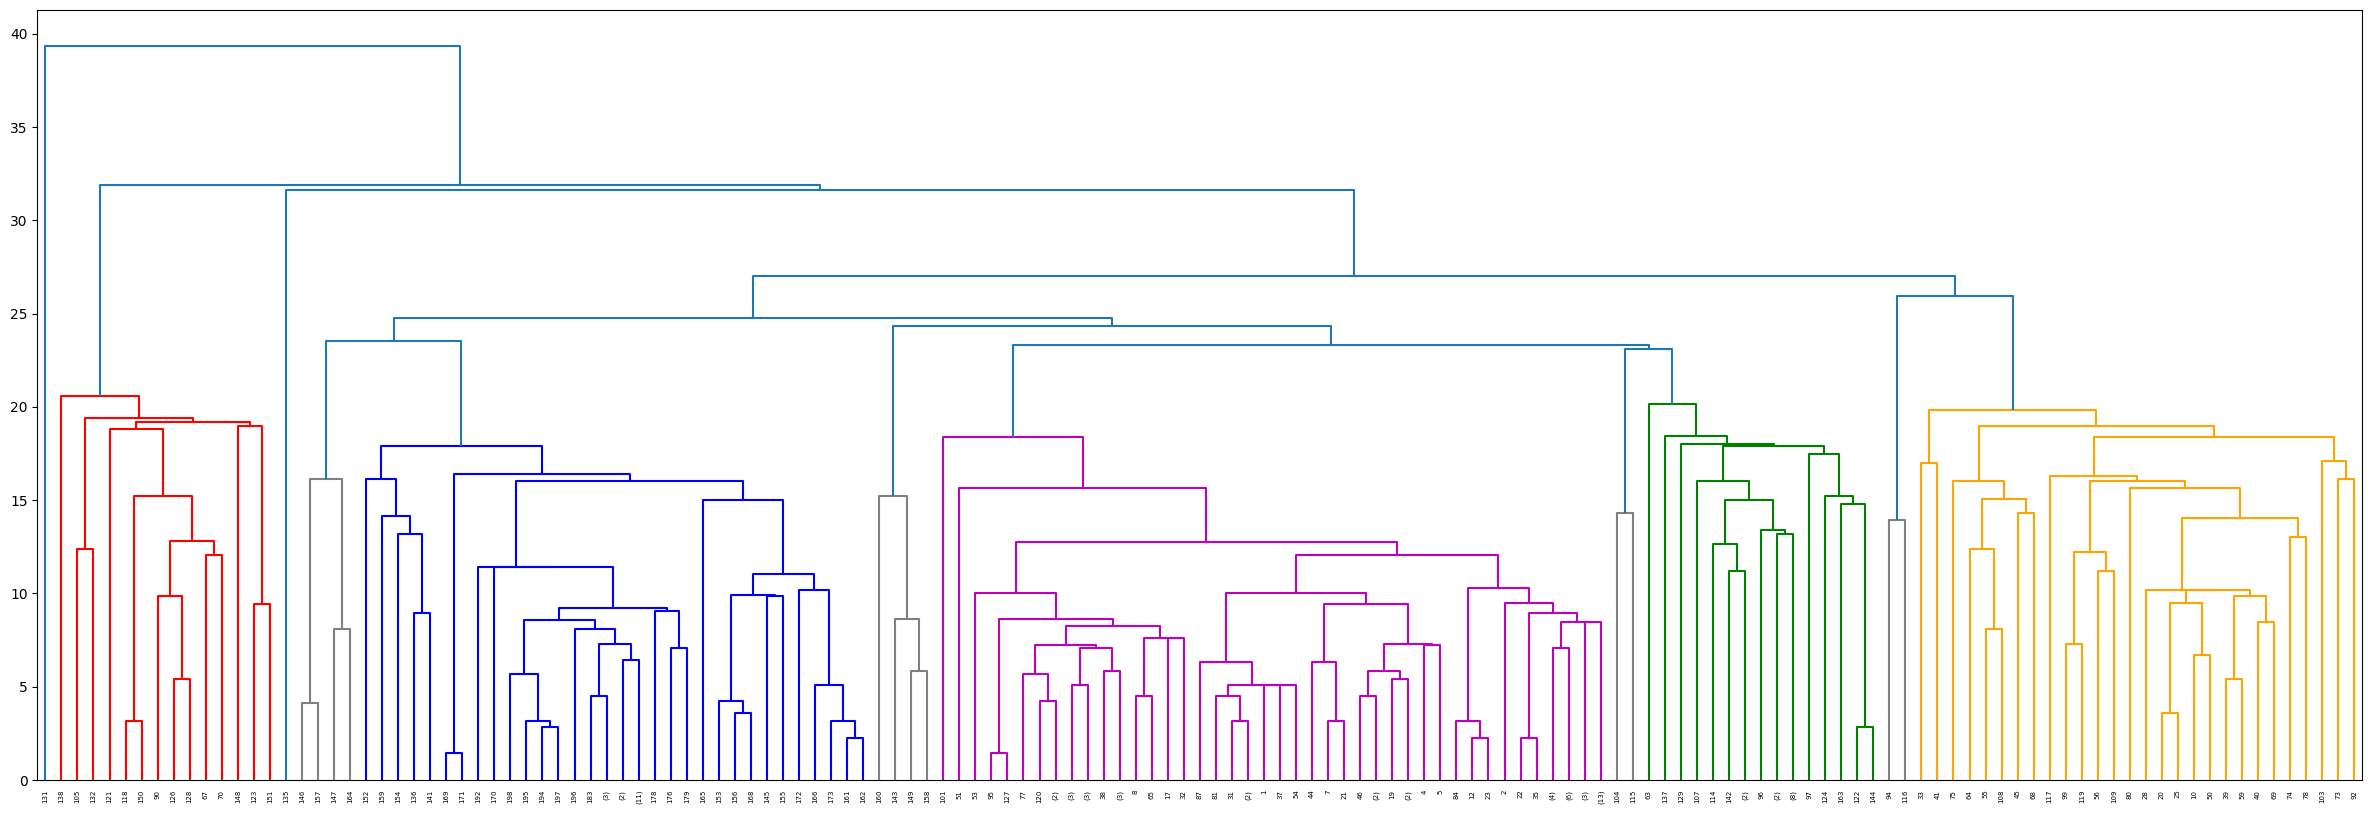

In [46]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

We see mainly 5 clusters being formed. This again justifies the k value we opted for in k means clustering.

Let's build the model with 5 clusters.

In [47]:
model = AgglomerativeClustering(n_clusters=5)

In [48]:
model.fit_predict(df) # predict the categories for each point.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

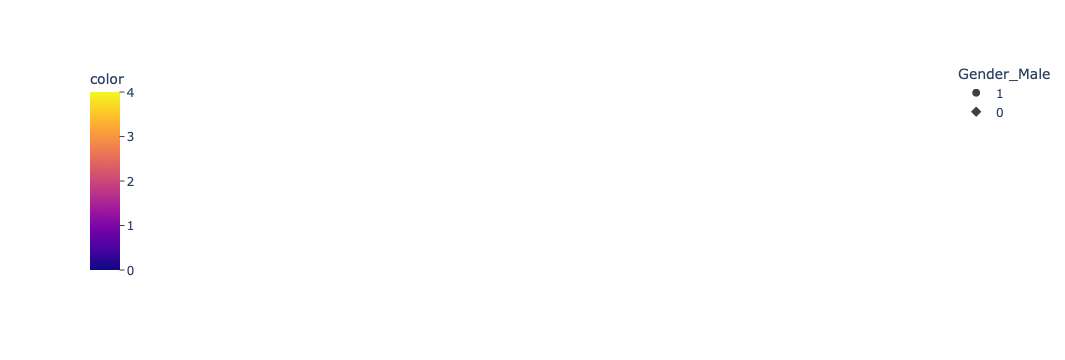

In [49]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=model.fit_predict(df), symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()

In line with k means, in hierarchical clusturing too, all points are well separated and the algo works well.

## <font color=#E94560>5.3 DBSCAN</font>
<a id="5.3"></a>

In [50]:
from sklearn.cluster import DBSCAN

In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.<br>
A good 'min_samples' number is two times the number of features (columns). We have 4 features so 'min_samples' value will be 8.<br>
To get a reasonable value for epsilon, we will again use the 'elbow method' between % of outlier points and epsilon.<br>
DBSCAN marks points that it thinks are outliers as being in a separate cluster labelled as '-1'.

In [51]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

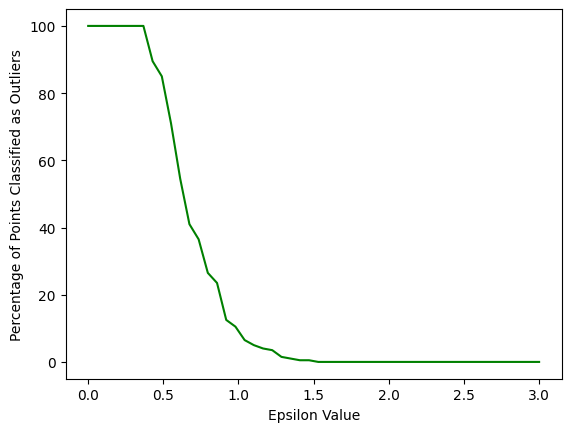

In [52]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' forms somewhere around epsilon = 1.2.<br>
Let's create a model wil epsilon value 1.2 and minimum number of samples 8.

In [53]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=8)

In [54]:
dbscan.labels_

array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1])

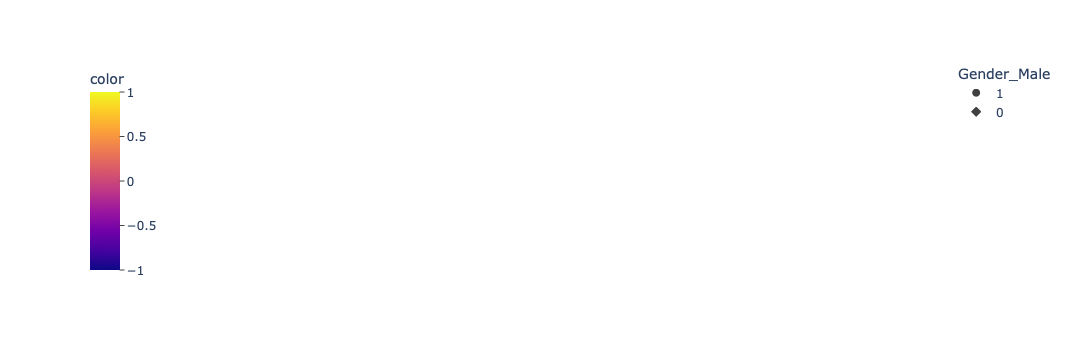

In [55]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=dbscan.labels_, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()

DBSCAN, with the set parameters does not perform well for this dataset. It divides the points into 2 classes and outliers.

Although not suggested, let's use df to create the model again instead of scaled_df. This is a trial and error method to see if this makes the model any better for the given dataset.

In [56]:
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(df)

DBSCAN(eps=1.2, min_samples=8)

In [57]:
outlier_percent = []

for eps in np.linspace(0.001,20,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2)
    dbscan.fit(df) # notice df instead of scaled_df
   
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

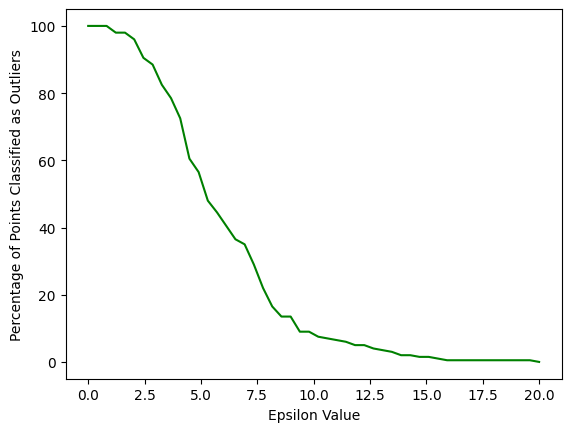

In [58]:
sns.lineplot(x=np.linspace(0.001,20,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

The 'elbow' in this case is being formed around epsilon value 12.

In [59]:
dbscan = DBSCAN(eps=12,min_samples=8)
dbscan.fit(df)

DBSCAN(eps=12, min_samples=8)

In [60]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1,  0, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2,  1,  2, -1,  2,  3,  2, -1,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

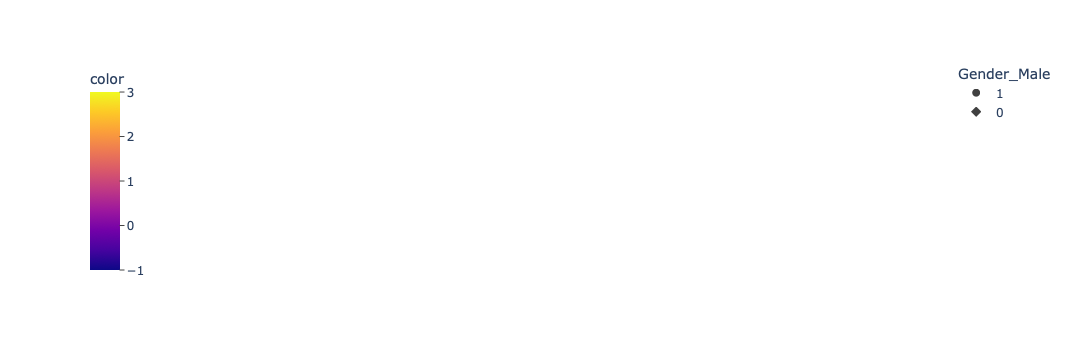

In [61]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=dbscan.labels_, symbol='Gender_Male', opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
# fig.show()

A slight improvement but still far from perfect.

# <div style="color:white;display:fill;border-radius:5px;background-color:#E94560;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>6 |</b> Conclusion</p></div>
<a id="6"></a>

Both k means and hierarchical clustering methods worked well. Let's create a new column with the generated cluster labels in k means.

In [62]:
df['labels'] = k_means_labels

In [63]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,labels
0,19,15,39,1,3
1,21,15,81,1,0
2,20,16,6,0,3
3,23,16,77,0,0
4,31,17,40,0,3


The final clustered dataset looks like:

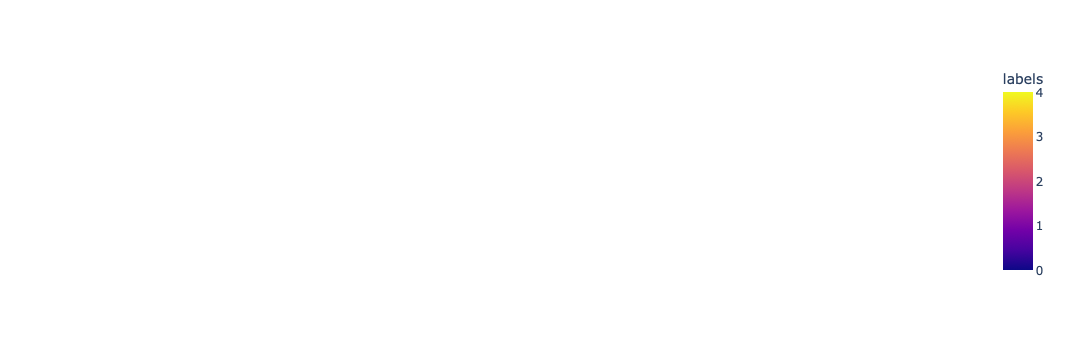

In [64]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='labels', opacity=0.75)
fig.show()

Notice there are no outliers (no points in -1 label).

We have created the categories. Now what?<br>
Based on the annual income, spending score values for the clusters, we can understand the type of customers in each cluster. <br>
From the above 3-D plot, we infer that in each cluster, customers of all ages are present. So age is not a distinguishing feature for differnt clusters.

Based on my understanding, I am renaming the clusters.

In [65]:
df['labels'] = df['labels'].map({
    0: 'high income & lavish lifestyle', # blue cluster
    1: 'average income & average lifestyle', # purple cluster
    2: 'high income & meagre lifestyle', # pink cluster
    3: 'low income & meagre lifestyle', # orange cluster
    4: 'low income & lavish lifestyle'}) # yellow cluster

In [66]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,labels
0,19,15,39,1,low income & meagre lifestyle
1,21,15,81,1,high income & lavish lifestyle
2,20,16,6,0,low income & meagre lifestyle
3,23,16,77,0,high income & lavish lifestyle
4,31,17,40,0,low income & meagre lifestyle


One final change we need to do - convert 'Gender_Male' column to 'Gender' column with values 'Male' and 'Female' instead of 1 and 0 respectively.

In [67]:
df['Gender'] = df['Gender_Male'].map({1: 'Male', 0: 'Female'})
df = df.drop('Gender_Male', axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),labels,Gender
0,19,15,39,low income & meagre lifestyle,Male
1,21,15,81,high income & lavish lifestyle,Male
2,20,16,6,low income & meagre lifestyle,Female
3,23,16,77,high income & lavish lifestyle,Female
4,31,17,40,low income & meagre lifestyle,Female


**We have completed our objective successfully!**

Any changes/suggestions to improve the notebook are welcome.

### **<font color=#E94560>Do upvote the notebook if you found it useful.</font>**<br>
Also view my other notebooks:<br>
• https://www.kaggle.com/aayush7kumar/deep-convolutional-gans-simplified<br>
• https://www.kaggle.com/aayush7kumar/cnn-with-vgg-inception-resnet-inception-resnet<br>
• https://www.kaggle.com/aayush7kumar/lendingclub-loan-data-prediction/<br>
• https://www.kaggle.com/aayush7kumar/predicting-covid-wave-3-in-india-using-lstm<br>